## Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

D:\python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading Model

In [2]:
model = tf.keras.models.load_model("trained_model.keras")

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

## viualizing Single Image of test setm

In [4]:
# !pip install opencv-python

<function matplotlib.pyplot.show(close=None, block=None)>

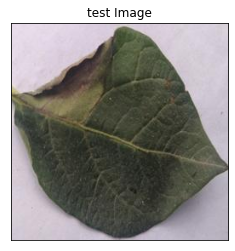

In [5]:
import cv2
image_path = "PLD_3_Classes_256/Training/Late_Blight/Late_Blight_1020.jpg"
#reading image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #convert BGR image to RGB


#displaying image
plt.imshow(img)
plt.title("test Image")
plt.xticks([])
plt.yticks([])
plt.show

## Testing Model

In [6]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  #convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [7]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 381ms/step


(array([[0.28987917, 0.0011323 , 0.7089885 ]], dtype=float32), (1, 3))

In [8]:
result_index = np.argmax(prediction)
result_index

2

In [9]:
class_name=['Early_Blight', 'Healthy', 'Late_Blight']

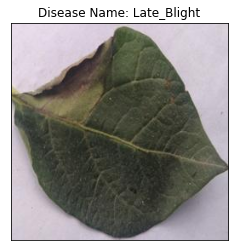

In [10]:
#Displaying result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
model_prediction

'Late_Blight'